In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

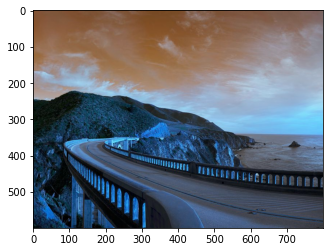

In [2]:
road = cv2.imread('DATA/road_image.jpg')
road_copy =np.copy(road)
plt.imshow(road)

In [3]:
road.shape

(600, 800, 3)

In [4]:
## MARKER IMAGE OF SAME SHAPE
marker_image = np.zeros(road.shape[:2], dtype=np.int32)

#SEGMENT
segments = np.zeros(road.shape, dtype=np.uint8)

print(marker_image.shape)
print(segments.shape)

(600, 800)
(600, 800, 3)


In [5]:
## COLOR MAPPING

from matplotlib import cm
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [6]:
cm.tab10(0)[:2]

(0.12156862745098039, 0.4666666666666667)

In [7]:
cm.tab10(0)[:3]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [11]:
tuple(np.array(cm.tab10(0)[:3]) * 255)

(31.0, 119.0, 180.0)

In [12]:
## Creating Segment Colors 

def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

colors = []

for i in range(10):
    colors.append(create_rgb(i))
    
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [15]:
## SETUP CALL BACK

In [20]:
###
# GLOBAL VARIABLES
#COLOR CHOICE

n_markers = 10 #0-9
current_marker = 1

#Markers Updated by WaterShed

marks_updated = False

In [21]:
## CALLBACK FUNC

def mouse_callback(event, x, y, flags, param):
    global marks_updated
    
    if event == cv2.EVENT_LBUTTONDOWN:
        #Markers passed to the watershed algo
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)
        
        #User sees on road image
        cv2.circle(road_copy, (x, y), 10, colors[current_marker], -1)
        marks_updated = True

In [25]:
## While True

cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    
    cv2.imshow('WaterShed Segments', segments)
    cv2.imshow('Road Image', road_copy)
    
    # Close All Windows
    
    k = cv2.waitKey(1)
    
    if k == 27:
        break
    # Clearing all the colors press C Key    
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2], dtype = np.int32)
        segments = np.zeros(road.shape, dtype=np.uint8)
    
    
    # Update Color Choice
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
        
    
    
    #Update the Markings
    if marks_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape, dtype=np.uint8)
        
        for color_ind in range(n_markers):
            #COLORING SEGMENTS, Numpy Call
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
    
    
    
cv2.destroyAllWindows()    